# **📝 📌 Problem Statement**

he goal of this project is to perform an in-depth exploratory data analysis (EDA) on chocolate sales data to uncover patterns, trends, and factors that influence chocolate sales across different regions, products, and time periods.

By understanding these patterns, businesses can make data-driven decisions to improve sales strategies, product distribution, and marketing efforts.

# **📊 📁Dataset Overview:**


This dataset contains detailed information on chocolate sales. The data can be used to analyze sales performance across different regions, products, and sales representatives, as well as to forecast future sales and derive business insights. It includes transactional details such as the salesperson, country of sale, product details, date, sales amount, and shipment quantity.

# **🧾 📌 Key Features (Columns)**



---



Sales Person;	Name of the person who made the sale

Country;	The country where the sale occurred

Product;	Type of chocolate product sold

Date;	Date of the transaction (in format like 04-Jan-22)

Amount; 	Total sale amount (e.g., "$5,320") – needs to be cleaned

Boxes Shipped;	Number of chocolate boxes shipped for the sale



**`Data Understanding & Cleaning`**



---


Data Loading and Initial Inspection:
We loaded the "Chocolate Sales.csv" file which contains key columns such as Sales Person, Country, Product, Date, Amount, and Boxes Shipped. We started by examining the data structure and checking for any inconsistencies.

`Data Cleaning:`

Amount Column: The dollar sign (“$”) and commas in the Amount column were removed and the values were converted into a numeric (float) format.
Date Conversion: The Date column was converted into the proper datetime format for time-based analyses.
Numeric Conversion: The Boxes Shipped column was converted to a numeric type, ensuring any non-numeric entries were handled.
Handling Missing Values: Missing data was handled by applying appropriate strategies like forward-filling or dropping incomplete rows.
Outlier Removal: Using the z-score method, outliers in the Amount and Boxes Shipped columns were identified and removed to ensure a robust analysis.
Feature Engineering: Additional time-based features (year, month, day, weekday) were extracted from the Date column, and categorical variables (Sales Person, Country, Product) were encoded for further analysis.

In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from prophet import Prophet
from itertools import combinations
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [50]:
import pandas as pd

# Load dataset
df = pd.read_csv("Chocolate Sales.csv")
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## 1. Data Understanding & Cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [52]:
#Clean 'Amount' column: remove '$' and ',' then convert to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)


# Regex (regular expression) is used here because it gives a powerful and flexible way to remove multiple unwanted characters (like $ and ,) at once, instead of doing .replace() multiple times.

In [53]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-53-df701e11f787>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [54]:
#errors='coerce' :“Try to convert all values in the column to proper date format.If any value is invalid or can’t be understood as a date, don’t crash — just convert it to NaT (Not a Time).”

In [55]:
# Ensure numerical columns are correct data types
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')

In [56]:
# Check for missing values
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [57]:
# Handle missing values (can be adjusted based on strategy)
df.dropna(inplace=True)

In [58]:
# This code removes rows that are outliers in Amount or Boxes Shipped columns based on Z-score > 3.

numeric_cols = ['Amount', 'Boxes Shipped']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

## 2. **Exploratory Data Analysis (EDA)**

**General Sales Distribution**

**2. Exploratory Data Analysis (EDA)¶**
Sales Distribution Over Time:
A line chart was created to visualize the trend of total sales over time. This helped in identifying overall sales trends and seasonal fluctuations.

Country-Based Analysis:
Total sales were aggregated by country and visualized using bar charts (and a choropleth map in earlier steps, though later analysis was done with Matplotlib/Seaborn). This analysis identified which countries contributed most to the sales revenue.

Product Preference Analysis:
The analysis included the ranking of products based on total sales and average sales amounts. Bar charts showed both the top-selling products as well as products with the highest average sale amount.

Shipping & Logistics Analysis:
The average number of boxes shipped per country was calculated, and a scatter plot was used to examine the relationship between boxes shipped and sales amount. This step helped to understand logistics performance in relation to sales.

Sales Person Performance:
Sales performance was evaluated by grouping data by the sales person. Total sales and average boxes shipped per sales representative were visualized using bar plots and boxplots, providing insights into individual performance.

Seasonality Analysis:
Sales were aggregated on a monthly basis to understand seasonal trends. A line plot highlighted the monthly sales pattern, and seasonal decomposition (when there was sufficient data) was applied to separate the trend, seasonal, and residual components.

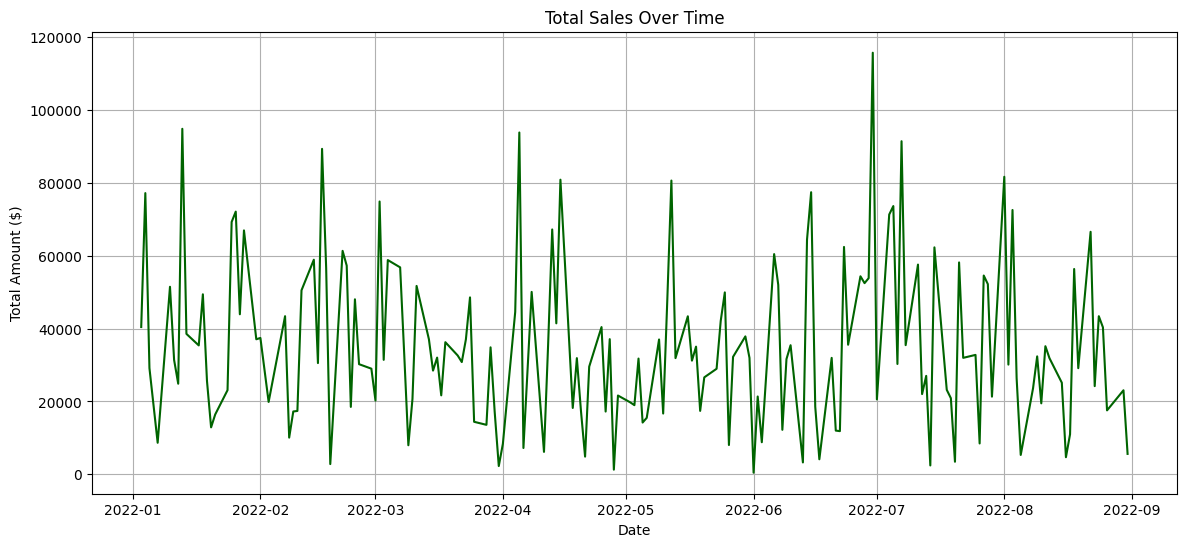

In [59]:
sales_by_date = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_date, x='Date', y='Amount', color='darkgreen')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.grid(True)
plt.show()

**Product Preference Analysis**

<ipython-input-60-3a80773e6171>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


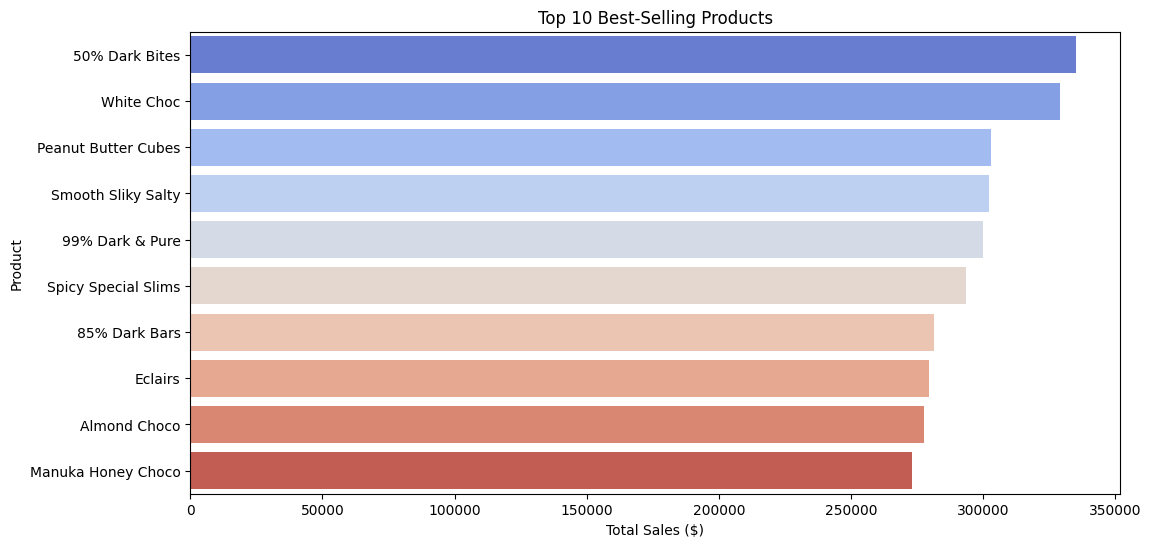

In [60]:

top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

**Average sales per product**

<ipython-input-61-6a9a7d77168f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')


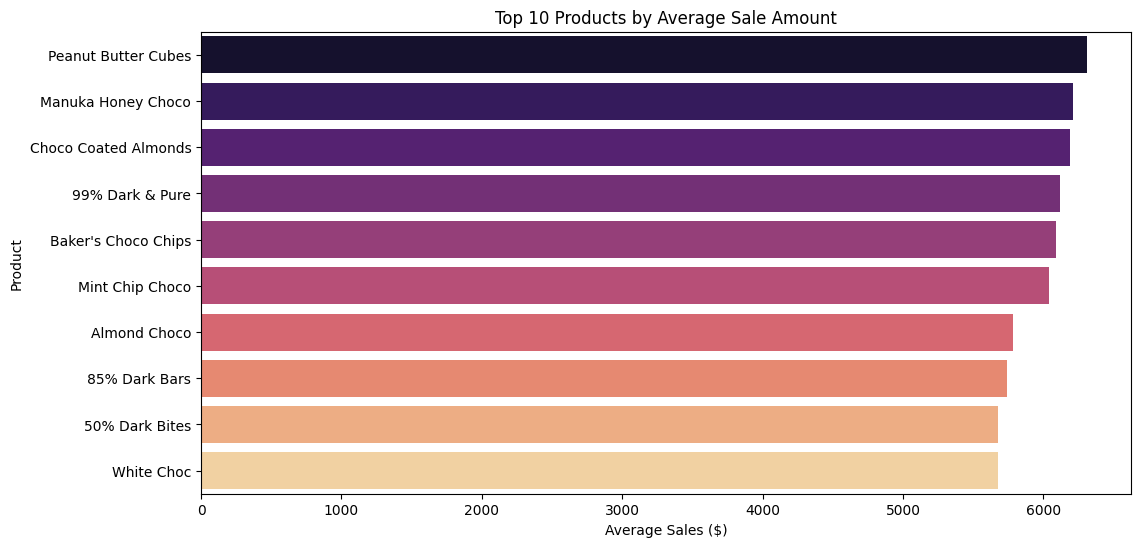

In [61]:
avg_sales_product = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')
plt.title('Top 10 Products by Average Sale Amount')
plt.xlabel('Average Sales ($)')
plt.ylabel('Product')
plt.show()

**Shipping & Logistics Analysis**

**Average boxes shipped per country**

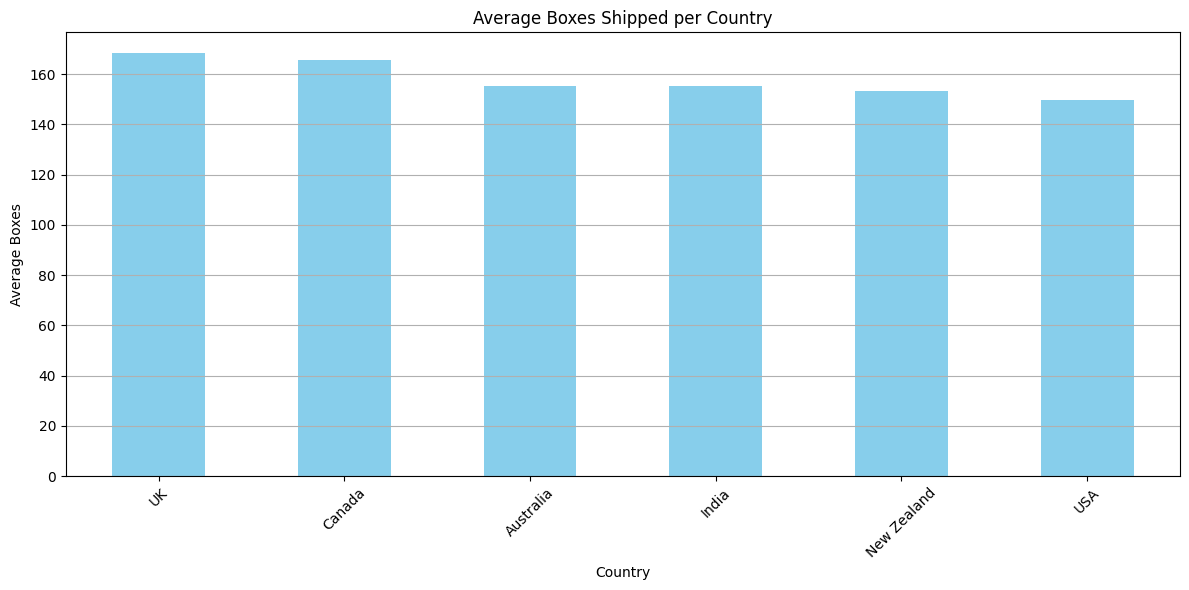

In [62]:
avg_boxes_country = df.groupby('Country')['Boxes Shipped'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_boxes_country.plot(kind='bar', color='skyblue')
plt.title('Average Boxes Shipped per Country')
plt.ylabel('Average Boxes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Scatter plot: Boxes vs Amoun**

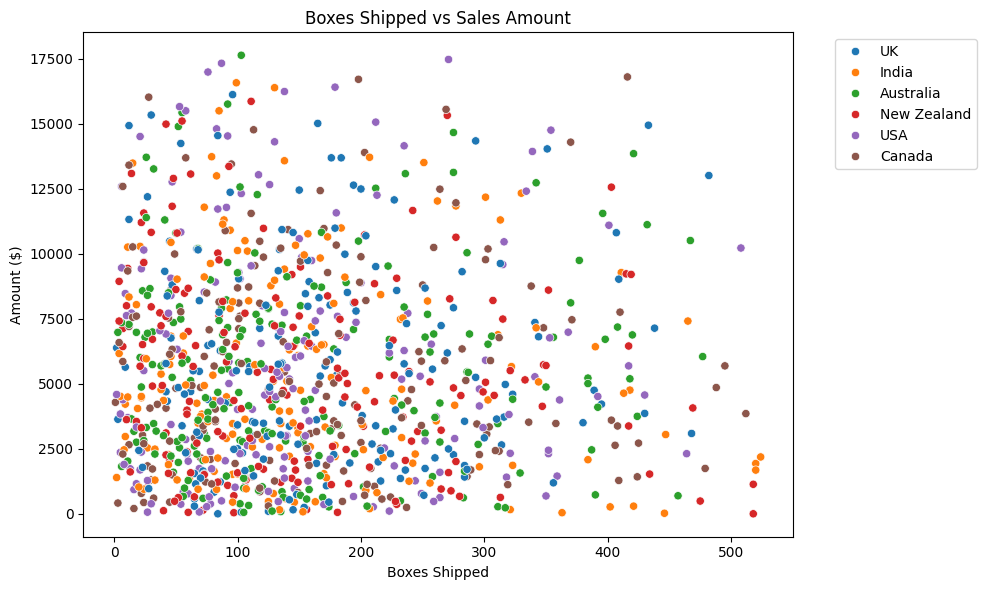

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', hue='Country')
plt.title('Boxes Shipped vs Sales Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Sales Representative Performance**

Total Sales Person

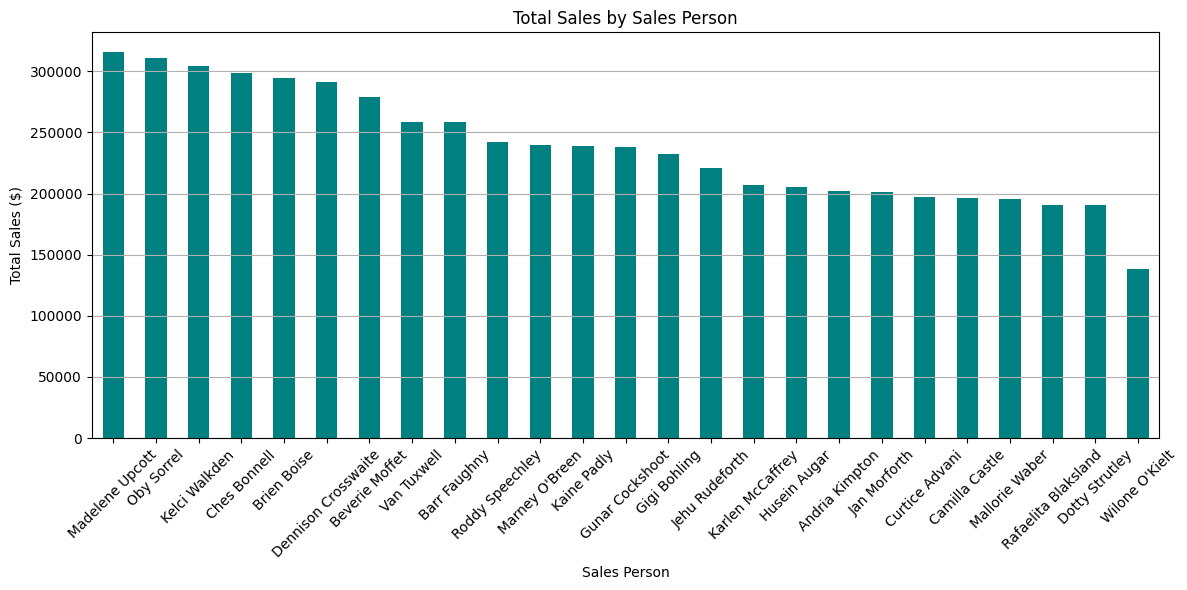

In [64]:
sales_by_rep = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_rep.plot(kind='bar', color='teal')
plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Calculate average boxes shipped by each sales person**

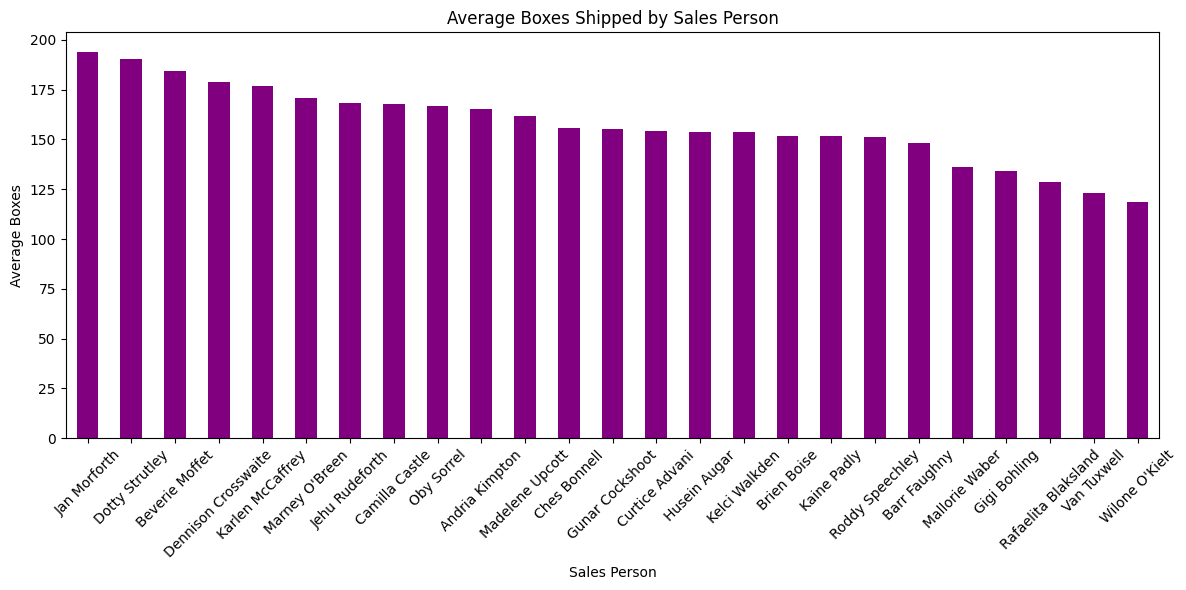

In [65]:
avg_boxes_rep = df.groupby('Sales Person')['Boxes Shipped'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_boxes_rep.plot(kind='bar', color='purple')
plt.title('Average Boxes Shipped by Sales Person')
plt.ylabel('Average Boxes')
plt.xlabel('Sales Person')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot: Sales Amount Distribution per Sales Person

<ipython-input-66-ac914ab5e2f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sales Person', y='Amount', palette='Set3')


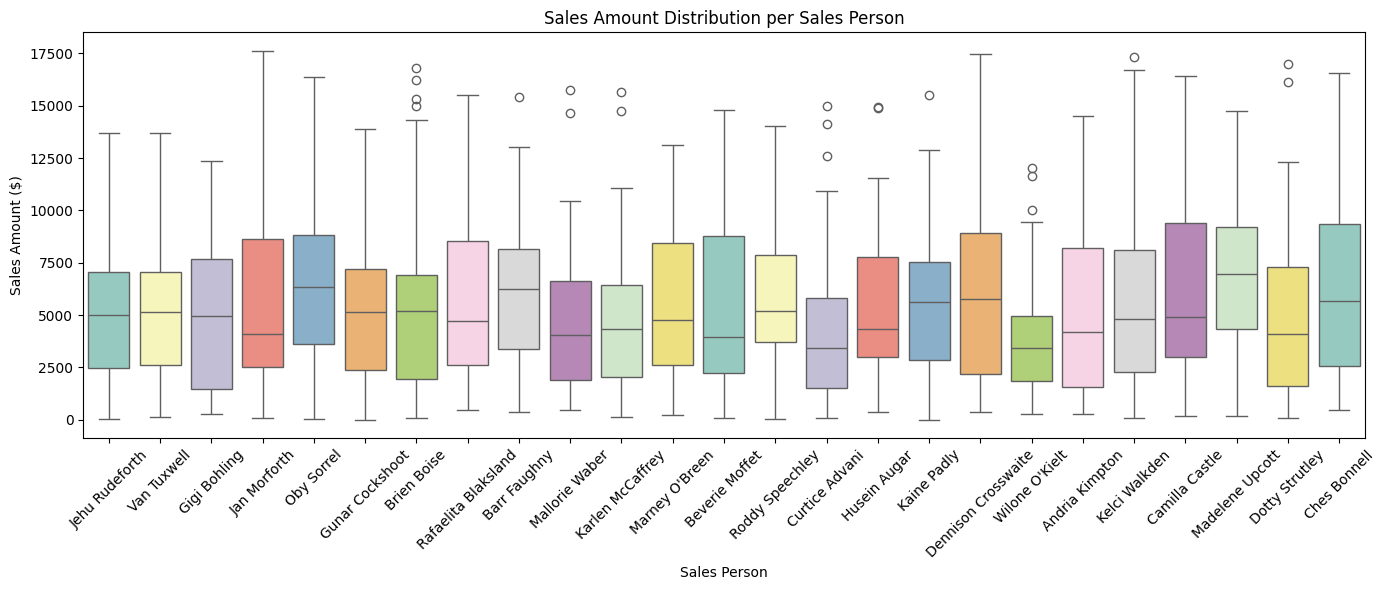

In [66]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Sales Person', y='Amount', palette='Set3')
plt.title('Sales Amount Distribution per Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Seasonality Analysis – Monthly Sales Trends**

1. Convert Date column to datetime format

In [67]:
df['Date'] = pd.to_datetime(df['Date'])

2. Create a 'Month' column in Year-Month format

In [68]:
df['Month'] = df['Date'].dt.to_period('M')

3. Calculate total sales per month

In [69]:
monthly_sales = df.groupby('Month')['Amount'].sum()

4. Plot monthly sales as a line chart

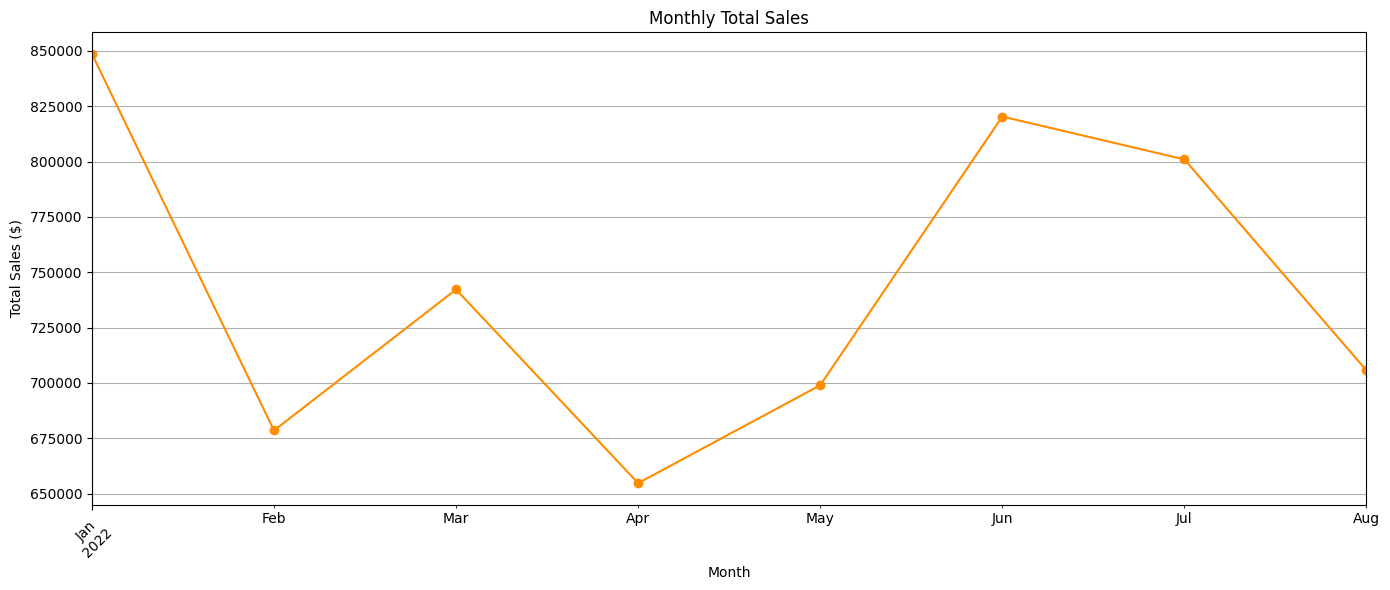

In [70]:
plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o', color='darkorange')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Convert PeriodIndex to DatetimeIndex for decomposition

In [71]:
monthly_sales_indexed = monthly_sales.copy()
monthly_sales_indexed.index = monthly_sales_indexed.index.to_timestamp()

6. Apply seasonal decomposition (additive model, period = 12 months)

In [72]:
result = seasonal_decompose(monthly_sales_indexed, model='additive', period=4)

7. Visualize the components: Trend, Seasonal, and Residual

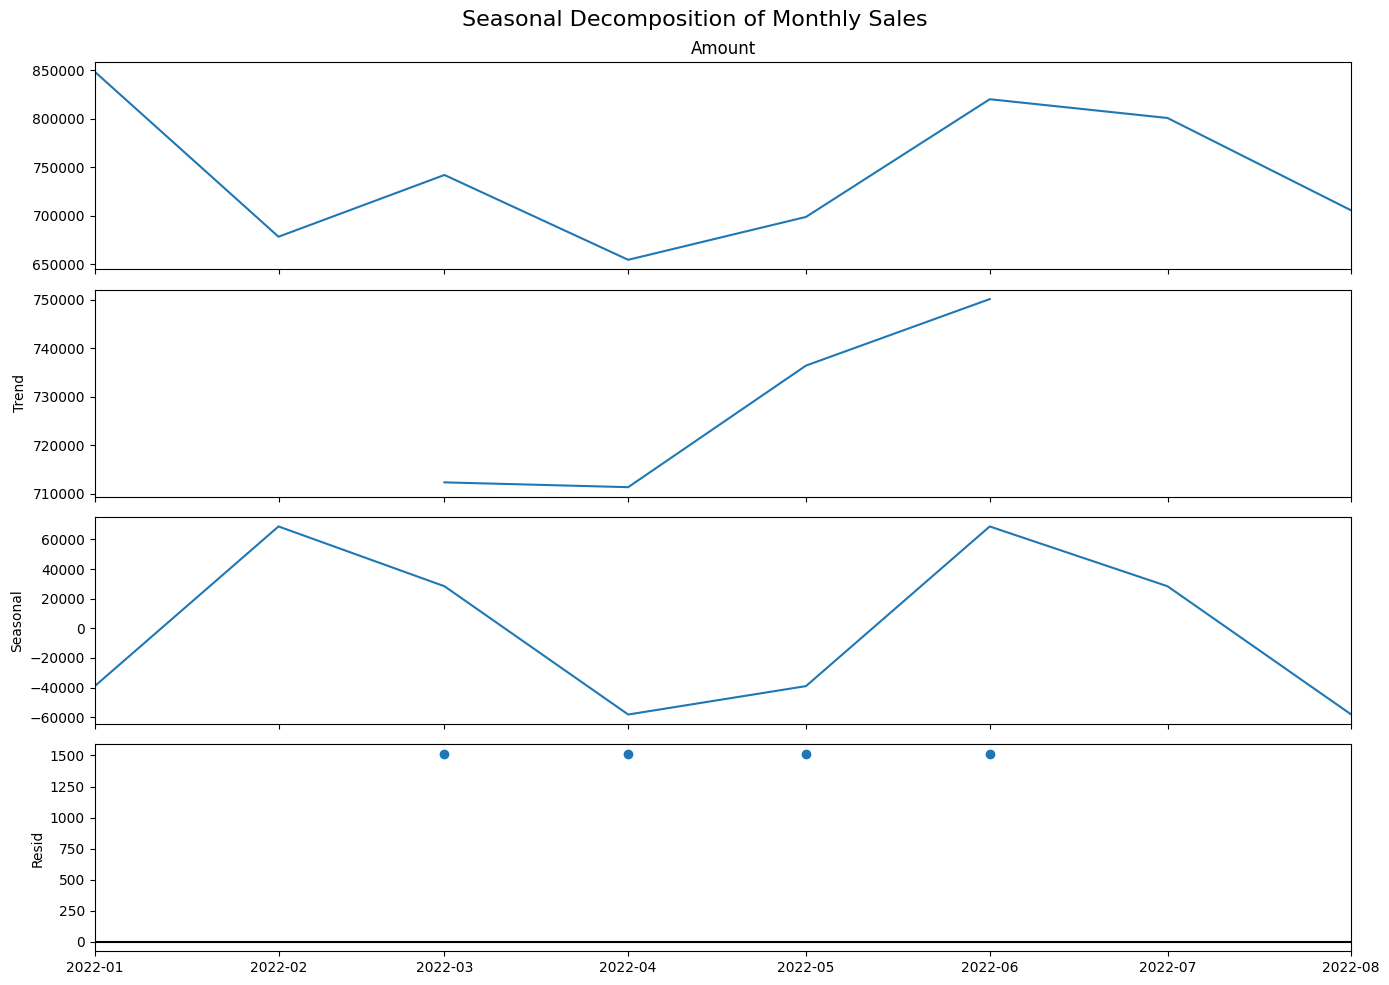

In [73]:
plt.rcParams.update({'figure.figsize': (14, 10)})
result.plot()
plt.suptitle("Seasonal Decomposition of Monthly Sales", fontsize=16)
plt.tight_layout()
plt.show()

# **Classification Model**

## Step 1: Create a binary classification target¶

In [74]:
threshold = df['Amount'].median()
df['High_Sales'] = (df['Amount'] > threshold).astype(int)

## Step 2: Feature Engineering

In [75]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

One-Hot Encoding for categorical variables¶

In [76]:
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)

## Step 3: Prepare Features and Target¶

In [78]:
X = df_encoded.drop(['Amount', 'High_Sales', 'Date'], axis=1)
y = df_encoded['High_Sales']

Train/Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

## **Step 4: Build and Train the Model**

In [80]:
clf = RandomForestClassifier(n_estimators=100, random_state=537)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=537)

## **Step 5: Evaluate the Model**

In [81]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49767441860465117

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.45      0.49       115
           1       0.47      0.55      0.50       100

    accuracy                           0.50       215
   macro avg       0.50      0.50      0.50       215
weighted avg       0.50      0.50      0.50       215



# Time Series Forecasting using Facebook Prophet¶

## Step 1: Prepare the DataFrame for **Prophet**

In [82]:
df_prophet = df[['Date', 'Amount']].copy()
df_prophet = df_prophet.groupby('Date').sum().reset_index()
df_prophet.columns = ['ds', 'y']

## **Step 2: Initialize the Model**

In [84]:
model = Prophet()

## **Step 3: Fit the Model**

In [85]:
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpar6stvmt/ag5d9ejg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpar6stvmt/g9kuze7t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29701', 'data', 'file=/tmp/tmpar6stvmt/ag5d9ejg.json', 'init=/tmp/tmpar6stvmt/g9kuze7t.json', 'output', 'file=/tmp/tmpar6stvmt/prophet_modelxni4hgat/prophet_model-20250417090150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Step 4: Create Future DataFrame for 3 months ahead¶**

In [86]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

## **Step 5: Plot the Forecast¶**

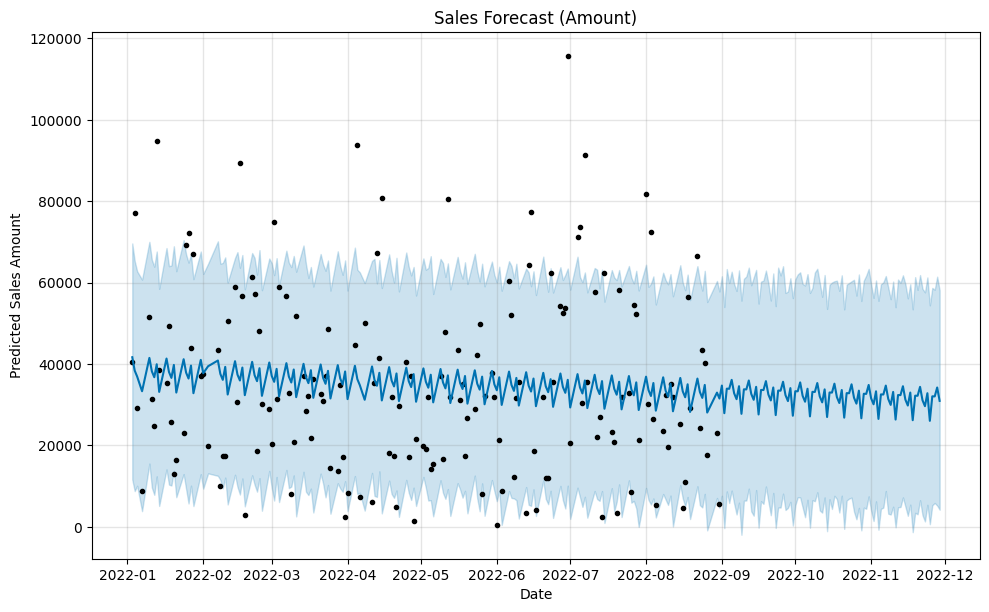

In [88]:
fig1 = model.plot(forecast)
plt.title("Sales Forecast (Amount)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales Amount")
plt.show()

## **Step 6: Decompose Forecast Components¶**

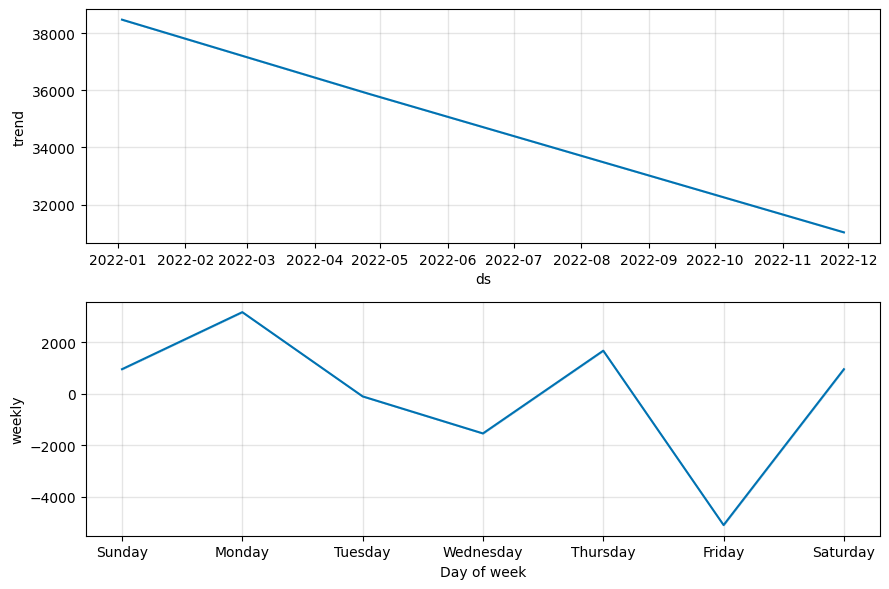

In [89]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

**Insight Generation & Business Recommendations**


## 1. Most Profitable Countries (Total Sales)¶

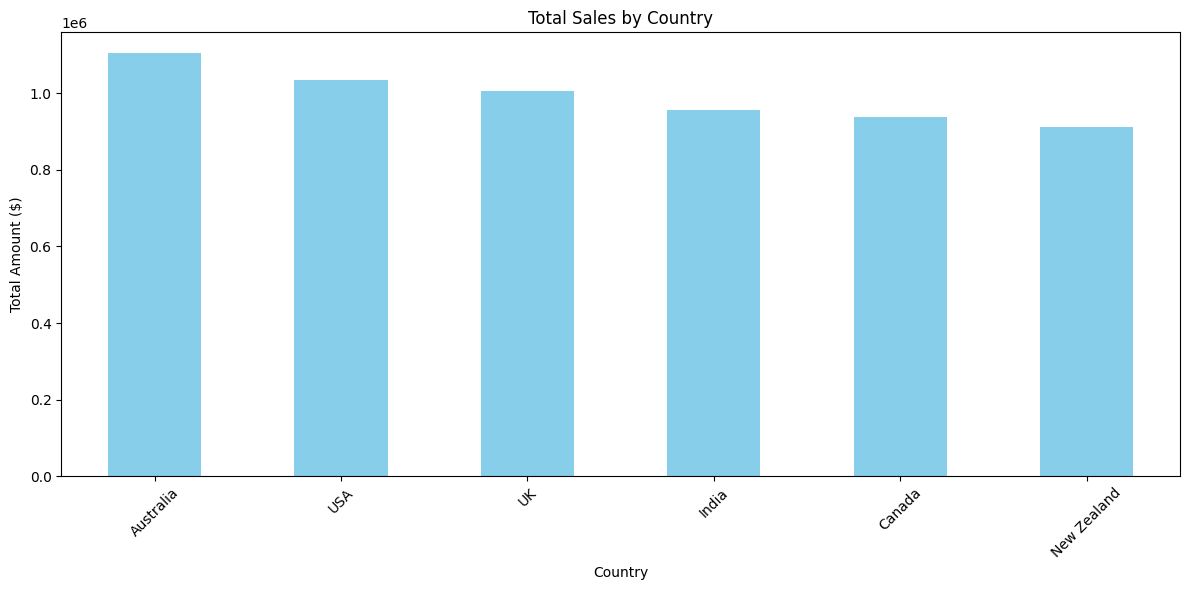

In [90]:
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **2. Most Efficient Sales Representatives**

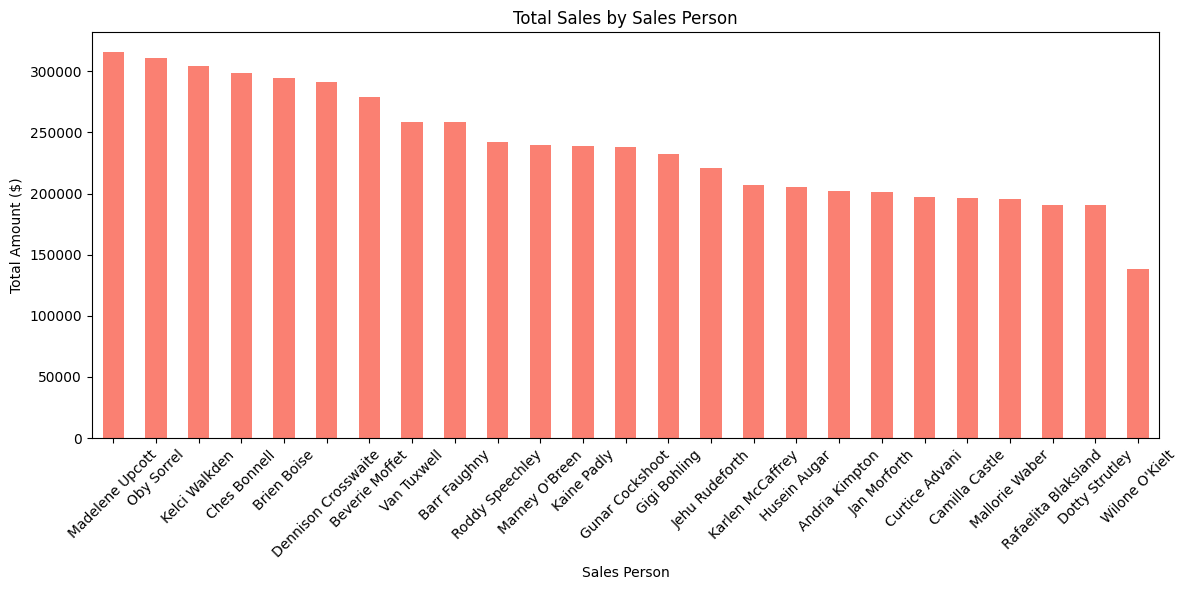

In [91]:
sales_by_rep = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_rep.plot(kind='bar', color='salmon')
plt.title('Total Sales by Sales Person')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3. Most Popular Products**

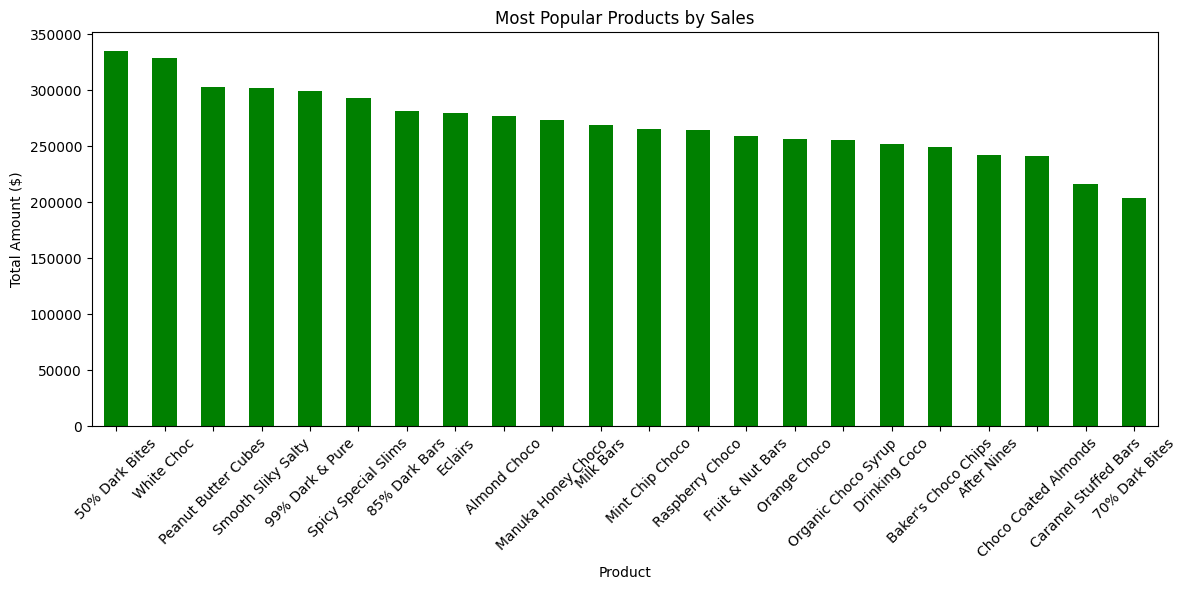

In [93]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='green')
plt.title('Most Popular Products by Sales')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **4. Product Combination Preference**

Get product combinations by customer per day (if possible)

<ipython-input-94-104e5f58bbea>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combos, x='Frequency', y=top_combos['Product Pair'].astype(str), palette='Blues_r')


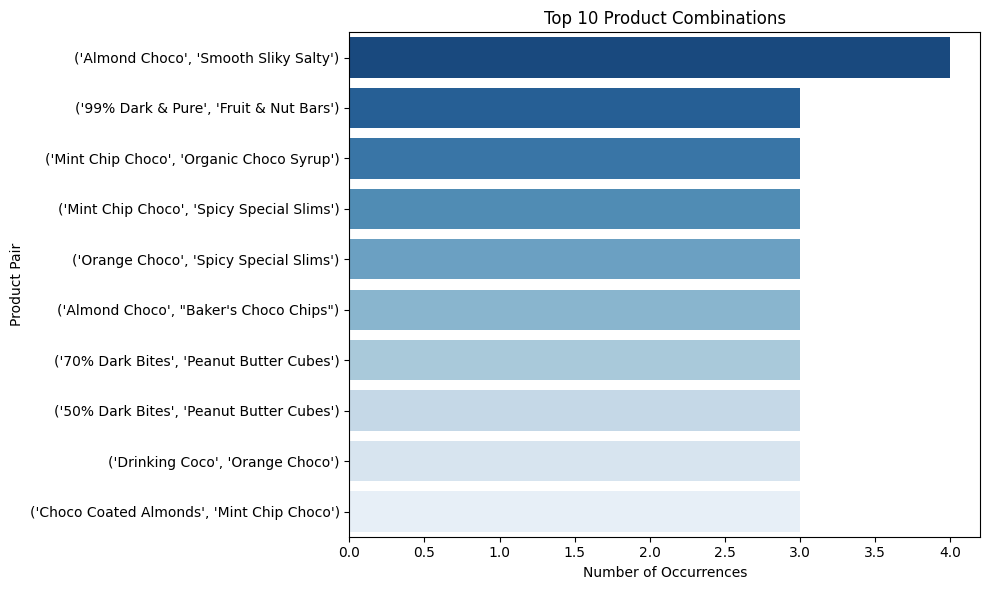

In [94]:
combo_df = df.groupby(['Date', 'Sales Person'])['Product'].apply(lambda x: list(x)).reset_index()
combinations_counter = Counter()

for products in combo_df['Product']:
    if len(products) > 1:
        combos = combinations(sorted(set(products)), 2)
        combinations_counter.update(combos)

top_combos = pd.DataFrame(combinations_counter.most_common(10), columns=['Product Pair', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_combos, x='Frequency', y=top_combos['Product Pair'].astype(str), palette='Blues_r')
plt.title('Top 10 Product Combinations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Pair')
plt.tight_layout()
plt.show()

## **5. Monthly Sales Trend for Seasonality¶**

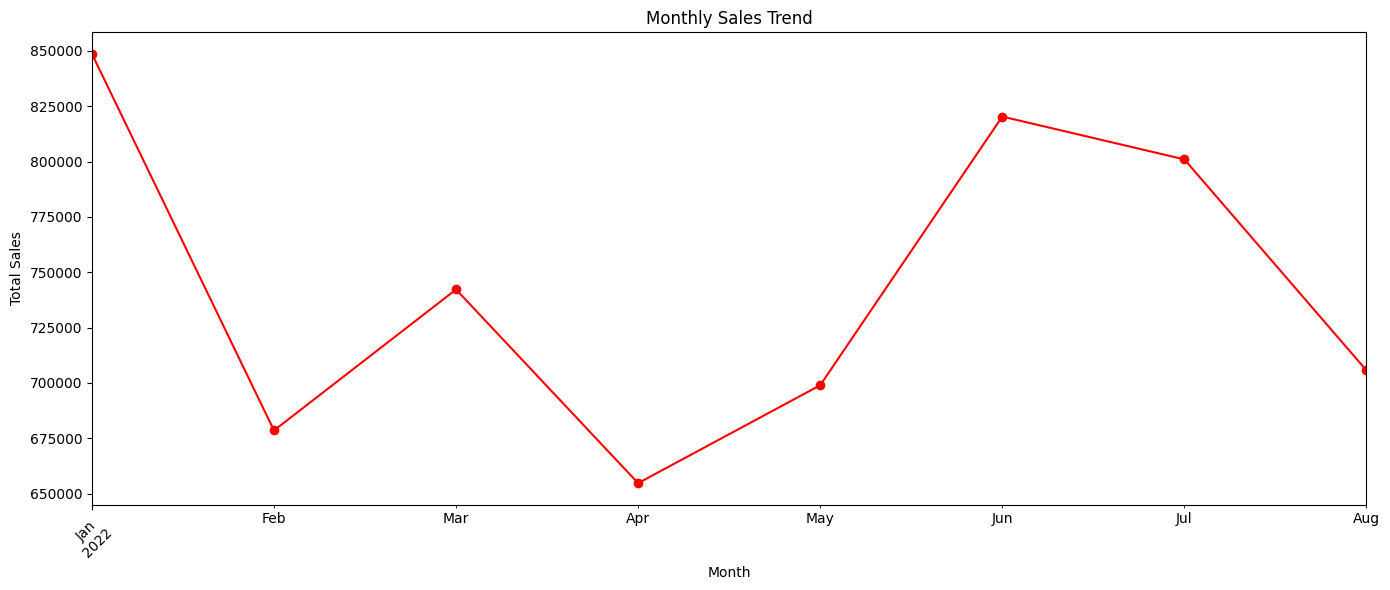

In [95]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o', linestyle='-', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Business Recommendations**

## **1. Most profitable country**

In [96]:
top_country = sales_by_country.idxmax()
top_country_amount = sales_by_country.max()
print(f"→ {top_country} has the highest total sales: ${top_country_amount:,.2f}.")

→ Australia has the highest total sales: $1,103,963.00.


## **2. Best Sales Person**

In [97]:
top_rep = sales_by_rep.idxmax()
print(f"→ Top sales representative is {top_rep}.")

→ Top sales representative is Madelene Upcott.


## **3. Top Selling Product**

In [98]:
top_product = top_products.idxmax()
print(f"→ The most popular product is: {top_product}.")

→ The most popular product is: 50% Dark Bites.


## **4. Suggested Marketing Strateg¶**

In [99]:
print("→ Consider promoting the top 3 product combinations together during seasonal campaigns.")

→ Consider promoting the top 3 product combinations together during seasonal campaigns.


## **5. Seasonal Suggestion**

In [100]:
peak_month = monthly_sales.idxmax().strftime('%B %Y')
print(f"→ Highest sales observed in {peak_month}. You can increase production or launch campaigns in this period.")

→ Highest sales observed in January 2022. You can increase production or launch campaigns in this period.


## **6. Logistics Suggestion¶**

In [101]:
avg_boxes_country = df.groupby('Country')['Boxes Shipped'].mean().sort_values(ascending=False)
low_efficiency_country = avg_boxes_country.idxmin()
print(f"→ Logistics improvement is needed in {low_efficiency_country}, where the average boxes per sale is lowest.")

→ Logistics improvement is needed in USA, where the average boxes per sale is lowest.


`Project Summary`: Chocolate Sales Analysis & Forecasting¶
In this project, we worked with a chocolate sales dataset to gain insights about sales performance, forecast future sales, and provide strategic business recommendations. The overall workflow was broken down into the following key steps: